In [ ]:
## import os
os.getcwd()
os.chdir("C://Users//Devyani//Downloads")
import pandas as pd
df=pd.read_csv("Model1csv.csv")
df.head()
import warnings
warnings.filterwarnings("ignore")

## Target- Closed

In [14]:
df.columns

Index(['id', 'ManamgementDimension', 'StrategicDimenision',
       'CustomerDimension', 'MarketDimension', 'FinanceDimension',
       'HRDimension', 'OperationalDimension', 'Industry_Vertical',
       'SubVertical', 'City', 'IndustryPerformance', 'CompetitiveLandscape',
       'InvestmentType', 'Invest_1st_Q_S', 'Year_of_Start', 'Empl_Cnt_Y1',
       'Closed'],
      dtype='object')

In [15]:
df = df.drop(["id"],1)

In [16]:
df.head()

,ManamgementDimension,StrategicDimenision,CustomerDimension,MarketDimension,FinanceDimension,HRDimension,OperationalDimension,Industry_Vertical,SubVertical,City,IndustryPerformance,CompetitiveLandscape,InvestmentType,Invest_1st_Q_S,Year_of_Start,Empl_Cnt_Y1,Closed
0,9,8,7,8,7,6,6,Consumer Internet,Online / Mobile Food Ordering platform,Bengaluru,High,Low,Angel / Seed Funding,5 Crore and Above,2016,Above 25,0
1,7,7,6,7,7,6,5,Consumer Internet,inter-city cab aggregator,New Delhi,Medium,High,Angel / Seed Funding,5 Crore and Above,2015,Above 25,0
2,9,9,5,4,7,6,6,Consumer Internet,Online Furnishing Rental Platform,Gurgaon,High,Medium,Angel / Seed Funding,5 Crore and Above,2015,Above 25,0
3,6,9,4,6,7,6,5,Consumer Internet,Online Bike & Car Services provider,Chennai,Medium,High,Angel / Seed Funding,2 - 5 Crores,2015,between 10 to 15,0
4,6,7,6,5,7,6,7,Consumer Internet,Fresh Food Delivery platform,Bengaluru,Medium,High,Debt Funding,5 Crore and Above,2014,Above 25,0


In [17]:
import numpy as np
numerical = df.select_dtypes(include = np.number)
categorical = df.select_dtypes(exclude = np.number)

In [18]:
for x in list(categorical):
    categorical[x] = categorical[x].str.lower()

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
for x in list(categorical):
    categorical[x] = le.fit_transform(categorical[x])

In [22]:
numerical["age"] = 2019 - df["Year_of_Start"]

In [23]:
numerical = numerical.drop(["Year_of_Start"],1)

In [24]:
df=pd.concat([numerical,categorical],1)

In [42]:
X = df.drop(["Closed"],1)
y = df["Closed"]

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                             min_samples_split=0.12)

In [45]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.12,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rfc.score(X,y)

0.5923387096774193

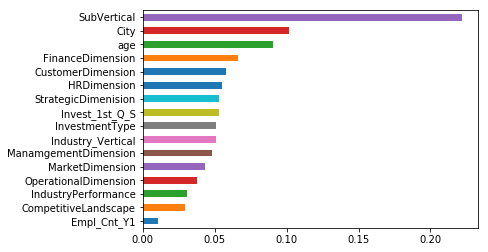

In [48]:
ok = pd.Series(rfc.feature_importances_, index = list(X)).sort_values(ascending=True).plot(kind = "barh")